In [11]:
import csv, copy, gzip, pickle

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

from scipy.stats import chi2

%matplotlib inline

mastermu = np.asarray([[2, 50], 
                 [4, 75],
                 [3, 90]]
               ).astype('float')

mastersigma = np.asarray([[[1, 0], 
                     [0, 3]], 
                    [[0.5, 0.2], 
                     [0.2, 0.6]],
                   [[.3,0],
                    [0,1]]]
                  ).astype('float')

mu = np.asarray([[2, 2], 
                 [5, 5]]
               ).astype('float')
sigma = np.asarray([[[1, 0], 
                     [0, 3]], 
                    [[0.5, 0.2], 
                     [0.2, 0.6]]]
                  ).astype('float')

with open('faithful.txt', 'rt') as csvfile:
    dataReader = csv.reader(csvfile, delimiter=' ')
    # initialize an empty array
    data = []
    for row in dataReader:
        data.append(np.array(row).astype(np.float))
    # convert data into a numpy array
    data = np.asarray(data)
    
print(data.dtype)
    
cov1 = [[1, 0], [0, 1]] #uncorrelated 
mean = [2, 2]
x1, y1 = np.random.multivariate_normal(mean, cov1, 50).T

cov = [[1, 0], [0, 1]] #uncorrelated 
mean = [10, 10]
x2, y2 = np.random.multivariate_normal(mean, cov1, 50).T

X = np.append(x1,x2),np.append(y1,y2)
data = np.round(np.array(X).T,2)

print(data.dtype)
    
ngmm = 2 # quantity of Gaussian Mixture Model

def covmatIsLegal(sigma):
    for covmat in sigma:
        if not(np.allclose(covmat, covmat.T)) or np.any(np.linalg.eigvals(covmat) <= 0):
            return False
    return True

print("Convariance Matrices are Legal? : %r" % covmatIsLegal(sigma))
gmm = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0/ngmm} for m in range(ngmm)]
def plotGaussianModel2D(mu, sigma, pltopt='k'):
    if sigma.any():
        # calculate ellipse constants
        c = chi2.ppf(0.9, 2) # use confidence interval 0.9
        # get eigen vector and eigen values
        eigenValue, eigenVector = np.linalg.eig(sigma)
        # calculate points on ellipse
        t = np.linspace(0, 2*np.pi, 100) # draw 100 points
        u = [np.cos(t), np.sin(t)]
        w = c * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
        z = w.T + mu
    else:
        z = mu
    # plot ellipse by connecting sample points on curve
    plt.plot(z[:,0], z[:,1], pltopt)
    
def colorPicker(index):
    colors = 'rgbcmyk'
    return colors[np.remainder(index, len(colors))]

def gmmplot(data, gmm):
    # plot data points
    plt.scatter(data[:, 0], data[:, 1], s=4)
    # plot Gaussian model
    color = 'rgb'
    for index, model in enumerate(gmm):
        plotGaussianModel2D(model['mean'], model['covariance'], colorPicker(index))
print(gmm)

float64
float64
Convariance Matrices are Legal? : True
[{'mean': array([2., 2.]), 'covariance': array([[1., 0.],
       [0., 3.]]), 'prior': 0.5}, {'mean': array([5., 5.]), 'covariance': array([[0.5, 0.2],
       [0.2, 0.6]]), 'prior': 0.5}]


[[ 2.71  2.2 ]
 [ 2.77  1.84]
 [ 0.51  0.61]
 [ 1.12  1.73]
 [ 1.06  1.91]
 [ 3.02  2.76]
 [ 0.17  0.61]
 [ 2.48  2.52]
 [ 1.8   1.99]
 [ 1.5   2.01]
 [ 2.56  2.21]
 [ 1.62  1.49]
 [ 3.54  2.46]
 [ 2.51  3.02]
 [ 2.69  2.2 ]
 [-0.07  2.94]
 [ 3.15  0.13]
 [ 1.47  3.78]
 [ 1.06  1.32]
 [ 2.87  1.16]
 [ 2.99  2.02]
 [ 0.53  1.52]
 [ 3.75  1.16]
 [ 3.42  1.75]
 [ 2.38  1.9 ]
 [ 3.65  3.13]
 [ 0.68  2.14]
 [ 0.95  2.37]
 [ 4.76  0.24]
 [ 4.25  2.56]
 [ 0.67  1.25]
 [ 1.9   1.71]
 [ 3.99  3.39]
 [ 1.66  1.47]
 [ 1.63  2.55]
 [ 1.21  2.45]
 [ 2.68  2.52]
 [ 2.22  0.58]
 [ 1.99  2.34]
 [ 0.4   2.39]
 [ 2.2   3.26]
 [ 1.12  1.16]
 [ 1.5   0.19]
 [ 2.41  2.91]
 [ 0.88  1.93]
 [ 2.34 -0.16]
 [ 1.59  1.2 ]
 [ 3.07  3.26]
 [ 0.43  1.73]
 [ 1.    0.92]
 [11.08 10.1 ]
 [10.43  9.93]
 [10.92 11.03]
 [11.2  11.3 ]
 [10.47  8.14]
 [ 8.82  8.76]
 [ 9.58  7.27]
 [ 8.93 11.05]
 [ 8.55 10.77]
 [10.67 10.42]
 [10.47  8.26]
 [11.72 10.18]
 [ 9.29 10.94]
 [11.16 11.18]
 [ 9.97 11.23]
 [11.11 11.34]
 [12.05  8

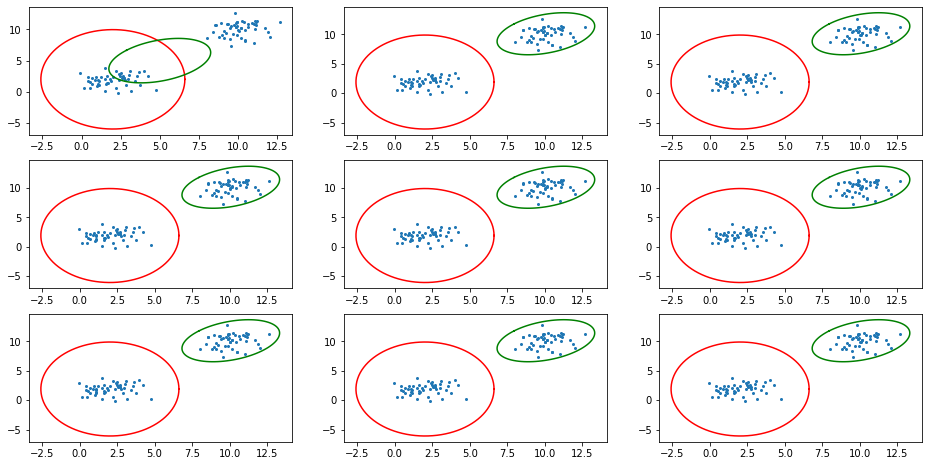

In [13]:
from scipy.stats import multivariate_normal as mvg

def get_responsibility(x, prior, mean, covar):
    mvg_pdf = mvg.pdf(x, mean = mean, cov = covar)
    return mvg_pdf * prior

def gather_responsibilities(x, m):
    responsibilities = []
    
    # Calculate the likelihood that class k is responsible for generating data point x
    for k in range(len(m)):
        prior = m[k]['prior']
        mean = m[k]['mean']
        covar = m[k]['covariance']
        responsibilities.append(get_responsibility(x, prior, mean, covar))
        
    # Normalize!
    divisor = np.sum(responsibilities)
    responsibilities /= divisor
    
    return responsibilities

def expectation(d, m):
    responsibilities = []
    for n in range(len(d)):
        # First, iterate through all values and compute the likelihoods / responsibilities
        resps = gather_responsibilities(d[n], m)
        responsibilities.append(resps)
        
    # And now normalize the results.
    divisors = np.array(responsibilities).sum(axis=0)
    for resp in responsibilities:
        for k in range(len(divisors)):
            resp[k] /= divisors[k]
        
    return responsibilities

def maximization_mean(p, d, m):
    new_gmm = []
    
    for k in range(len(m)):
        new_mean = np.zeros_like(m[k]['mean'])
        
        for n in range(len(d)):
            x = d[n]
            new_mean += p[n][k] * x
            
        new_gmm.append({'mean': new_mean, 'covariance': m[k]['covariance'], 'prior': m[k]['prior']})
        
    return new_gmm

# make a true copy of our model
gmmcp = copy.deepcopy(gmm)

# create figure
plt.figure(figsize=(16, 8))
# improve model with EM-Algorithm
for i in range(8):
    # plot current status
    plt.subplot(331 + i)
    gmmplot(data, gmmcp)
    # excute EM-Algorithm
    for j in range(5):
        posterior = expectation(data, gmmcp)
        gmmcp = maximization_mean(posterior, data, gmmcp)
print(data)
# plot final status
plt.subplot(339)
gmmplot(data, gmmcp)

In [6]:
def maximization(p, d, m):
    new_gmm = []
    
    for k in range(len(m)):
        cur_mean = m[k]['mean']
        new_mean = np.zeros_like(m[k]['mean'])
        new_covar = np.zeros_like(m[k]['covariance'])
        new_prior = 0
        
        for n in range(len(d)):
            new_mean += p[n][k] * d[n]
            new_prior += p[n][k] / np.sum(p[n])
            
        #Have to do covariance after computing the new mean
        for n in range(len(d)):
            x_minus_mean = np.reshape(d[n] - new_mean, (len(d[n]), 1))
            x_minus_mean_T = x_minus_mean.transpose()
            mat_prod = p[n][k] * (x_minus_mean * x_minus_mean_T)
            new_covar += mat_prod
            
        new_prior /= len(d)
            
        new_gmm.append({'mean': new_mean, 'covariance': new_covar, 'prior': new_prior})
        
    return new_gmm

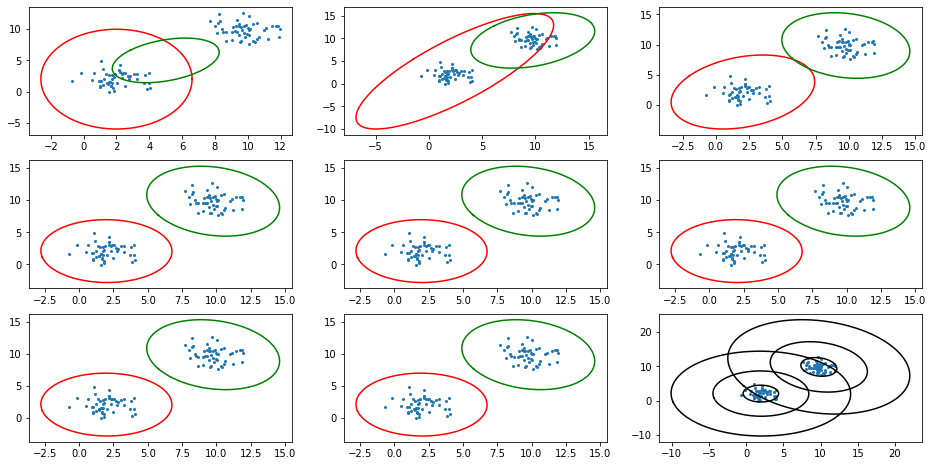

In [9]:
from sklearn import mixture
# make a true copy of our model
gmmcp = copy.deepcopy(gmm)

# create figure
plt.figure(figsize=(16, 8))
# improve model with EM-Algorithm
finalCov = None
finalMean = None
for i in range(8):
    # plot current status
    plt.subplot(331 + i)
    gmmplot(data, gmmcp)
    # excute EM-Algorithm
    for j in range(1):
        posterior = expectation(data, gmmcp)
        gmmcp = maximization(posterior, data, gmmcp)
    if i == 7:
        finalCov = gmmcp[0]['covariance']
        finalMean = gmmcp[0]['mean']
        finalCov2 = gmmcp[1]['covariance']
        finalMean2 = gmmcp[1]['mean']
        
    
# plot final status
plt.subplot(339)
# calculate ellipse constants
c1 = chi2.ppf(0.683, 2) # use confidence interval 0.9
c2 = chi2.ppf(0.955,2)
c3 = chi2.ppf(0.997,2)
# get eigen vector and eigen values
eigenValue, eigenVector = np.linalg.eig(finalCov)
# calculate points on ellipse
t = np.linspace(0, 2*np.pi, 100) # draw 100 points
u = [np.cos(t), np.sin(t)]
w = c1 * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
w2 = c2 * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
w3 = c3 * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
z = w.T + finalMean
z2 = w2.T + finalMean
z3 = w3.T + finalMean
# plot ellipse by connecting sample points on curve
plt.plot(z[:,0], z[:,1], 'k')
plt.plot(z2[:,0], z2[:,1], 'k')
plt.plot(z3[:,0], z3[:,1], 'k')
# plot final status
# calculate ellipse constants
c1 = chi2.ppf(0.683, 2) # use confidence interval 0.9
c2 = chi2.ppf(0.955,2)
c3 = chi2.ppf(0.997,2)
# get eigen vector and eigen values
eigenValue, eigenVector = np.linalg.eig(finalCov2)
# calculate points on ellipse
t = np.linspace(0, 2*np.pi, 100) # draw 100 points
u = [np.cos(t), np.sin(t)]
w = c1 * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
w2 = c2 * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
w3 = c3 * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
z = w.T + finalMean2
z2 = w2.T + finalMean2
z3 = w3.T + finalMean2
# plot ellipse by connecting sample points on curve
plt.plot(z[:,0], z[:,1], 'k')
plt.plot(z2[:,0], z2[:,1], 'k')
plt.plot(z3[:,0], z3[:,1], 'k')
plt.scatter(data[:, 0], data[:, 1], s=4)

[[ 2.02  1.72]
 [ 2.19 -0.06]
 [ 2.49  3.05]
 [ 1.46  1.05]
 [ 1.61  0.26]
 [ 0.59  2.68]
 [ 2.93  2.89]
 [ 3.85  2.84]
 [ 1.67  2.72]
 [ 4.13  3.15]
 [ 1.89  1.64]
 [ 1.6   3.15]
 [ 0.98  1.43]
 [ 2.17  2.56]
 [ 2.53  2.08]
 [ 2.64  0.91]
 [ 1.63  2.01]
 [ 0.68  1.27]
 [ 2.2   0.38]
 [ 2.27  1.7 ]
 [ 0.81  2.48]
 [ 0.55  1.48]
 [ 1.76  2.13]
 [ 2.42  1.15]
 [ 1.81  2.27]
 [ 0.95  2.58]
 [ 2.    2.37]
 [ 2.11  3.52]
 [-0.28  1.23]
 [ 1.59  0.23]
 [ 3.07  1.62]
 [ 2.64  2.17]
 [ 2.    3.21]
 [ 3.72  2.76]
 [ 2.49  3.19]
 [ 2.66  1.8 ]
 [ 2.49  2.29]
 [ 1.91  2.34]
 [ 2.51  3.57]
 [ 1.77  2.39]
 [ 2.74  2.72]
 [ 1.7   0.61]
 [ 2.53  2.68]
 [ 3.24  1.95]
 [ 2.29  1.96]
 [ 0.76  2.43]
 [ 1.48  2.67]
 [ 2.93  2.05]
 [ 0.94  1.36]
 [ 2.02  1.73]
 [11.1   9.63]
 [10.62 12.23]
 [ 9.49  9.51]
 [10.38 10.41]
 [10.04  9.55]
 [10.31 10.81]
 [10.89 10.12]
 [ 9.41 10.82]
 [ 7.99 11.6 ]
 [11.76 11.35]
 [ 9.34 10.23]
 [ 9.27 10.04]
 [ 9.61  9.23]
 [ 8.89  9.09]
 [11.35 10.56]
 [ 9.9   9.91]
 [10.42 11

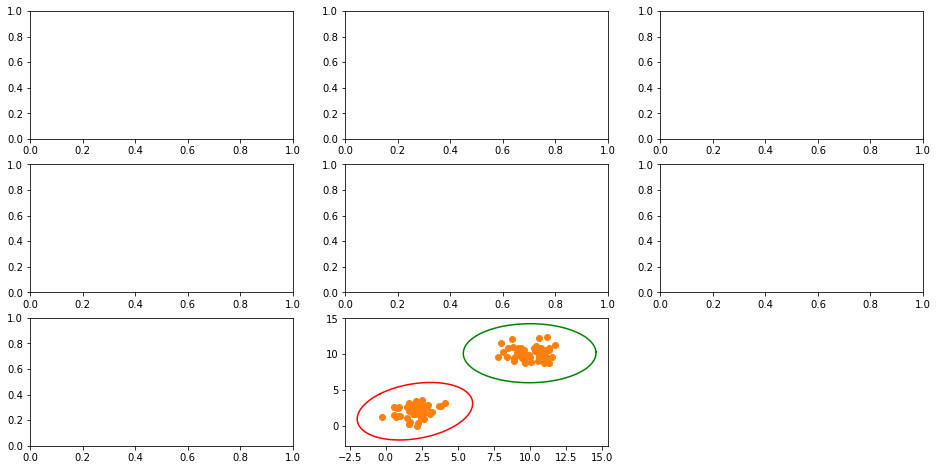

In [145]:
from sklearn import mixture
# make a true copy of our model
gmmcp = copy.deepcopy(gmm)


print(data)
# create figure
plt.figure(figsize=(16, 8))
# improve model with EM-Algorithm
finalCov = None
finalMean = None
for i in range(8):
    # plot current status
    plt.subplot(331 + i)
    # excute EM-Algorithm
    for j in range(1):
        posterior = expectation(data, gmmcp)
        gmmcp = maximization(posterior, data, gmmcp)
    if i == 7:
        finalCov = gmmcp[0]['covariance']
        finalMean = gmmcp[0]['mean']
        finalCov2 = gmmcp[1]['covariance']
        finalMean2 = gmmcp[1]['mean']
g = mixture.GaussianMixture(n_components=2)
g = g.fit(X = data)
print(g.get_params())
gmmplot(data, gmmcp)
print(finalCov,finalMean)
print(finalCov2,finalMean2)
plt.scatter(X[0],X[1])